# Data Collection
## 1. PAU Narrowband data

In [ ]:
from astropy.io import fits
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from tabulate import tabulate
import socket
import math

In [ ]:
nb = fits.open('/content/sample_data/PAU_narrowband_data_full.fits')

In [ ]:
nb[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  516 / length of dimension 1                          
NAXIS2  =                 6492 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  126 / number of table fields                         
TTYPE1  = 'ref_id  '                                                            
TFORM1  = 'K       '                                                            
TTYPE2  = 'zb      '                                                            
TFORM2  = 'E       '                                                            
TTYPE3  = 'odds    '        

1. zb: posterior redshift mode (peak in p(z))
2. odds: ODDS parameter is defined as
  \begin{align}
                  ODDS ≡ \int^{z_b + \Delta z}_{z_b - \Delta z} dz\text{ }p(z)
                  \end{align}
3. qz: Photo-z Quality parameter, which attempts to combine various quality parameter.

4. 

In [ ]:
nb_arr = np.array(nb[1].data)
np.shape(nb_arr)

(6492,)

In [ ]:
np.ndim(nb_arr)

1

In [ ]:
nb_arr1 = nb_arr.byteswap().newbyteorder()

In [ ]:
np.ndim(nb_arr)

1

In [ ]:
df_nb = pd.DataFrame(nb_arr1)

In [ ]:
df_nb[["zspec","zb","zb_mean","zp_gal"]]

,zspec,zb,zb_mean,zp_gal
0,0.5499,0.544,0.5450,0.552
1,0.7751,0.798,0.7958,0.777
2,0.2464,0.243,0.2432,0.249
3,0.7016,0.704,0.7028,0.674
4,0.9235,0.936,0.9314,0.927
...,...,...,...,...
6487,0.7014,0.702,0.7000,0.695
6488,0.3218,0.321,0.3235,0.318
6489,0.5286,0.527,0.5272,0.549
6490,0.6120,0.585,0.5829,0.593


In [ ]:
final_np_arr = pd.DataFrame(df_nb).to_numpy()

In [ ]:
print(df_nb.columns.tolist())

['ref_id', 'zb', 'odds', 'pz_width', 'zb_mean', 'chi2', 'ebv', 'qz', 'best_run', 'ra', 'dec', 'zp_gal', 'zl68_gal', 'zu68_gal', 'zl99_gal', 'zu99_gal', 'zp_sec', 'dchi', 'imag', 'ei', 'i_auto', 'nbfilt', 'mod_gal', 'type', 'umag', 'bmag', 'vmag', 'gmag', 'rmag', 'zmag', 'icmag', 'jmag', 'kmag', 'mv', 'ebv_gal', 'ebv_int', 'acs_a_image', 'acs_b_image', 'acs_theta_image', 'acs_mag_auto', 'acs_magerr_auto', 'zspec', 'conf', 'f814w', 'r50', 'sersic_n_gim2d', 'flux_nb455', 'flux_nb465', 'flux_nb475', 'flux_nb485', 'flux_nb495', 'flux_nb505', 'flux_nb515', 'flux_nb525', 'flux_nb535', 'flux_nb545', 'flux_nb555', 'flux_nb565', 'flux_nb575', 'flux_nb585', 'flux_nb595', 'flux_nb605', 'flux_nb615', 'flux_nb625', 'flux_nb635', 'flux_nb645', 'flux_nb655', 'flux_nb665', 'flux_nb675', 'flux_nb685', 'flux_nb695', 'flux_nb705', 'flux_nb715', 'flux_nb725', 'flux_nb735', 'flux_nb745', 'flux_nb755', 'flux_nb765', 'flux_nb775', 'flux_nb785', 'flux_nb795', 'flux_nb805', 'flux_nb815', 'flux_nb825', 'flux_nb8

In [ ]:
df_nb.shape

(6492, 126)

In [ ]:
df_nb[df_nb["zspec"] == 0]

,ref_id,zb,odds,pz_width,zb_mean,chi2,ebv,qz,best_run,ra,...,flux_error_nb755,flux_error_nb765,flux_error_nb775,flux_error_nb785,flux_error_nb795,flux_error_nb805,flux_error_nb815,flux_error_nb825,flux_error_nb835,flux_error_nb845


## 2. Photo-z Extra Data

## 3. Combining the data

I am just starting with the first database right now and trying to look at the results. If successful, then only I will add the rest of the data to it.

In [ ]:
df_nb.columns.get_loc("zspec")

41

In [ ]:
np.shape(nb_arr1)

(6492,)

In [ ]:
bb_arr = final_np_arr[:,df_nb.columns.get_loc("umag"):df_nb.columns.get_loc("kmag")+1]

In [ ]:
bb_arr = np.power(10, (26 - bb_arr)/2.5)

In [ ]:
np.shape(bb_arr)

(6492, 9)

In [ ]:
nb_arr = final_np_arr[:,df_nb.columns.get_loc("flux_nb455"):df_nb.columns.get_loc("flux_nb845")+1]
np.shape(nb_arr)

(6492, 40)

In [ ]:
nb_arr = np.power(10, (26 - nb_arr)/2.5)

In [ ]:
zspec_arr = final_np_arr[:,df_nb.columns.get_loc("zspec")]

In [ ]:
np.ndim(zspec_arr)

1

In [ ]:
zspec_arr = np.reshape(zspec_arr,[6492,1])

## Normalizing the data

In [ ]:
for i in range(len(bb_arr)):
  result_bb = np.linalg.norm(bb_arr[i])
  bb_arr[i] = bb_arr[i]/result_bb

In [ ]:
bb_arr[0]

array([0.09320129, 0.14106595, 0.18425607, 0.11841917, 0.24514462,
       0.38852804, 0.33529082, 0.43794747, 0.63888393])

# Defining the Network Architecture

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.l1 = nn.Linear(9,9)
    self.d1 = nn.Dropout(p = 0.02)
    self.l2 = nn.Linear(9, 300)
    self.d2 = nn.Dropout(p = 0.02)
    self.l3 = nn.Linear(300, 500)
    self.d3 = nn.Dropout(p = 0.02)
    self.l4 = nn.Linear(500,1000)
    self.d4 = nn.Dropout(p = 0.02)
    self.l5 = nn.Linear(1000,500)

    self.d6 = nn.Dropout(p = 0.02)
    self.l6 = nn.Linear(500,300)
    self.pz = nn.Linear(300,1)

  def forward(self, x):
    m = nn.GELU()
    x = m(self.l1(x))
    x = self.d1(x)
    x = m(self.l2(x))
    x = self.d2(x)
    x = m(self.l3(x))
    x = self.d3(x)
    x = m(self.l4(x))
    x = self.d4(x)
    x = m(self.l5(x))

    photoz = self.d6(x)
    photoz = m(self.l6(photoz))
    photoz = m(self.pz(photoz))
    
    return photoz



net = Net()
print(net)

Net(
  (l1): Linear(in_features=9, out_features=9, bias=True)
  (d1): Dropout(p=0.02, inplace=False)
  (l2): Linear(in_features=9, out_features=300, bias=True)
  (d2): Dropout(p=0.02, inplace=False)
  (l3): Linear(in_features=300, out_features=500, bias=True)
  (d3): Dropout(p=0.02, inplace=False)
  (l4): Linear(in_features=500, out_features=1000, bias=True)
  (d4): Dropout(p=0.02, inplace=False)
  (l5): Linear(in_features=1000, out_features=500, bias=True)
  (d6): Dropout(p=0.02, inplace=False)
  (l6): Linear(in_features=500, out_features=300, bias=True)
  (pz): Linear(in_features=300, out_features=1, bias=True)
)


In [ ]:
net.parameters()

<generator object Module.parameters at 0x7f6b406704d0>

# Loss Function & Optimizer

In [ ]:
import torch.optim as optim

criterion_pz = nn.MSELoss()
#criterion_nb = nn.L1Loss()

optimizer = optim.Adam(net.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=25, gamma=0.1)

## Final data verification:

Let's make a final list of all the arrays and dtypes of the data we have, both for input and for output.

1. zspec_arr: Numpys array of the spectroscopic redshifts, being used as groundtruths for comparing redshift losses. This has to be converted to a **classification data**, rather than the direct data we have. This has to form a bin.

2. nb_arr: Numpy array of the final narrow band data. This just has to be converted to PyTorch tensors.

3. bb_arr: Numpy array of the input broadband data. This too just has to be converted to tensor before training.

In [ ]:
import math
math.ceil(1.4991/0.001) - 1

1499

In [ ]:
# Spectroscopic data
# import math
# bin_zspec = np.zeros([len(bb_arr),1500])
# for i in list(range(0,len(bb_arr),1)):
#   n = math.ceil(zspec_arr[i]/0.001) - 1
#   bin_zspec[i,n] = 1


In [ ]:
tensor_zspec = torch.from_numpy(zspec_arr)
tensor_zspec = tensor_zspec.to(torch.float32)

In [ ]:
# Narrowband data

tensor_nb = torch.from_numpy(nb_arr)
tensor_nb = tensor_nb.to(torch.float32)

In [ ]:
# Broadband data
tensor_bb = torch.from_numpy(bb_arr)
tensor_bb = tensor_bb.to(torch.float32)
#tensor_bb = math.pow(10,((26 - tensor_bb)/2.5))

In [ ]:
tensor_bb[0]

tensor([0.0932, 0.1411, 0.1843, 0.1184, 0.2451, 0.3885, 0.3353, 0.4379, 0.6389])

Now splitting the data into testing and training data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
bb_train, bb_test, nb_train, nb_test, pz_train, pz_test = train_test_split(tensor_bb, tensor_nb, tensor_zspec, test_size = 0.2, shuffle=True)

# Training the model

In [ ]:
# batch_size = 10

# x_input = np.ones([num_batches,1])
# nb_input = np.ones([num_batches,1])
# pz_input = np.ones([num_batches,1])

# for i in list(range(0, num_batches,1)):
#   if i != num_batches-1:
#     x_input[0,i] = [bb_train[i*batch_size: (i+1)*batch_size][:]]
#     nb_input[0,i] = [nb_train[i*batch_size: (i+1)*batch_size][:]]
#     pz_input[0,i] = [pz_train[i*batch_size: (i+1)*batch_size][:]]
  
#   else:
#     x_input[i] = bb_train[i*batch_size:-1]
#     nb_input[i] = nb_train[i*batch_size: -1]
#     pz_input[i] = pz_train[i*batch_size: -1]

In [ ]:
batch_size = 10
num_batches = int(len(bb_train)/batch_size)

for epoch in range(100):  # loop over the dataset multiple times
    #running_loss = 0.0
    for i in list(range(0, num_batches, 1)):

        # zero the parameter gradients
        optimizer.zero_grad()
    
        # forward + backward + optimize
        photoz = net(bb_train[i*batch_size: (i+1)*batch_size][:])
        #nband, photoz = net(bb_train[i])
        #loss1 = criterion_pz(photoz, pz_train[i])
        #loss2 = criterion_nb(nband, nb_train[i])
        loss1 = criterion_pz(photoz, pz_train[i*batch_size: (i+1)*batch_size][:])
        #loss2 = criterion_nb(nband, nb_train[i*batch_size: (i+1)*batch_size][:])
        #loss = loss1 + loss2
        #optimizer.zero_grad()
        loss1.backward()
        optimizer.step()

        # print statistics
        # running_loss += loss1.item()
        # if i % 200 == 199:    # print every 2000 mini-batches
        #     print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200:.3f}')
        #     running_loss = 0.0
    print(f'[{epoch + 1}] loss: {loss1:.3f}')
    scheduler.step()
print('Finished Training')

[1] loss: 0.037
[2] loss: 0.011
[3] loss: 0.016
[4] loss: 0.017
[5] loss: 0.010
[6] loss: 0.007
[7] loss: 0.006
[8] loss: 0.029
[9] loss: 0.006
[10] loss: 0.003
[11] loss: 0.006
[12] loss: 0.013
[13] loss: 0.002
[14] loss: 0.006
[15] loss: 0.004
[16] loss: 0.003
[17] loss: 0.003
[18] loss: 0.006
[19] loss: 0.002
[20] loss: 0.003
[21] loss: 0.006
[22] loss: 0.007
[23] loss: 0.002
[24] loss: 0.013
[25] loss: 0.001
[26] loss: 0.002
[27] loss: 0.001
[28] loss: 0.002
[29] loss: 0.001
[30] loss: 0.001
[31] loss: 0.002
[32] loss: 0.003
[33] loss: 0.001
[34] loss: 0.001
[35] loss: 0.001
[36] loss: 0.001
[37] loss: 0.001
[38] loss: 0.001
[39] loss: 0.001
[40] loss: 0.003
[41] loss: 0.001
[42] loss: 0.001
[43] loss: 0.001
[44] loss: 0.002
[45] loss: 0.001
[46] loss: 0.001
[47] loss: 0.001
[48] loss: 0.007
[49] loss: 0.001
[50] loss: 0.001
[51] loss: 0.001
[52] loss: 0.001
[53] loss: 0.001
[54] loss: 0.001
[55] loss: 0.001
[56] loss: 0.001
[57] loss: 0.001
[58] loss: 0.000
[59] loss: 0.008
[60] l

# Testing the outputs

In [ ]:
PATH = 'mymodel1.pt'
torch.save(net,PATH)

In [ ]:
import os
pythonfile = 'mymodel1.pt'
 
# if the file is present in current directory,
# then no need to specify the whole location
print("Path of the file..", os.path.abspath(pythonfile))
 

Path of the file.. /content/mymodel1.pt


In [ ]:
from prettytable import PrettyTable

def count_parameters(model):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        params = parameter.numel()
        table.add_row([name, params])
        total_params+=params
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params
    
count_parameters(net)

+-----------+------------+
|  Modules  | Parameters |
+-----------+------------+
| l1.weight |     81     |
|  l1.bias  |     9      |
| l2.weight |    2700    |
|  l2.bias  |    300     |
| l3.weight |   150000   |
|  l3.bias  |    500     |
| l4.weight |   500000   |
|  l4.bias  |    1000    |
| l5.weight |   500000   |
|  l5.bias  |    500     |
| l6.weight |   150000   |
|  l6.bias  |    300     |
| pz.weight |    300     |
|  pz.bias  |     1      |
+-----------+------------+
Total Trainable Params: 1305691


1305691

In [ ]:
predicted_pz = net(bb_test)

In [ ]:
bb_test[0]

tensor([0.0208, 0.0434, 0.0932, 0.0459, 0.1229, 0.3003, 0.2059, 0.4381, 0.8046])

In [ ]:
bb_test.size()

torch.Size([1299, 9])

In [ ]:
pz_test.size()

torch.Size([1299, 1])

In [ ]:
predicted_pz

tensor([[0.3448],
        [0.2685],
        [0.5159],
        ...,
        [0.6485],
        [0.7913],
        [0.6772]], grad_fn=<GeluBackward0>)

In [ ]:
pz_test

tensor([[0.3272],
        [0.2653],
        [0.5290],
        ...,
        [0.6705],
        [0.7544],
        [0.6723]])

Text(0, 0.5, 'Predicted redshift')

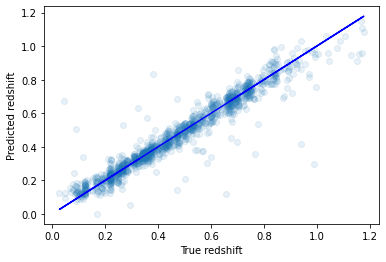

In [ ]:
x = pz_test.detach().numpy()
y = predicted_pz.detach().numpy()
import matplotlib.pyplot as plt
plt.scatter(x,y, alpha = 0.1)
plt.plot(x,x, 'b-')
plt.xlabel('True redshift')
plt.ylabel('Predicted redshift')

# Metrics for Measurement

In [ ]:
dz = np.ones([len(y),1])
for i in range(len(y)):
  dz[i] = (y[i] - x[i])/(1 + x[i])

In [ ]:
np.mean(dz)

0.0004913223653986329

In [ ]:
arrx = x
arry = dz/(1 + x)

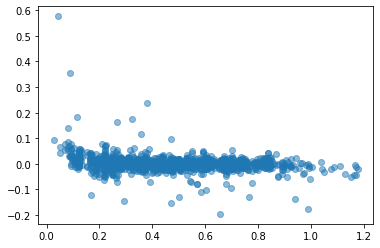

In [ ]:
plt.scatter(arrx,arry,alpha=0.5)

In [ ]:
np.mean(arry)

0.0015018035716473962

In [ ]:
np.std(dz)

0.043561120093195696

In [ ]:
from sklearn.metrics import mean_gamma_deviance as sigma

In [ ]:
x

array([[0.3272],
       [0.2653],
       [0.529 ],
       ...,
       [0.6705],
       [0.7544],
       [0.6723]], dtype=float32)

In [ ]:
np.where(y==0)

(array([1292]), array([0]))

In [ ]:
y[1292]

array([0.], dtype=float32)

In [ ]:
ynew = np.delete(y,[1292,0])
xnew = np.delete(x,[1292,0])

In [ ]:
sigma(xnew,ynew)

0.039639246